<a href="https://colab.research.google.com/github/Kishorecsmani/Myproject/blob/main/Case_Study_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1cGUkEvXKj73wmIYWY614813P9s6_f-Re

Downloading...
From: https://drive.google.com/uc?id=1cGUkEvXKj73wmIYWY614813P9s6_f-Re
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 163MB/s]


##look at data

In [ ]:
df = pd.read_csv("netflix.csv")       # df0 = Intial dataframe without unnesting of columns with multiple values
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

##Converting date_added to date format 

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df['added_year'] = df['date_added'].dt.year
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [ ]:
df['added_month'] = df['date_added'].dt.month
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0


## Removing Null values in columns

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_year    8797 non-null   float64       
 13  added_month   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
added_year       0.11
added_month      0.11
dtype: float64


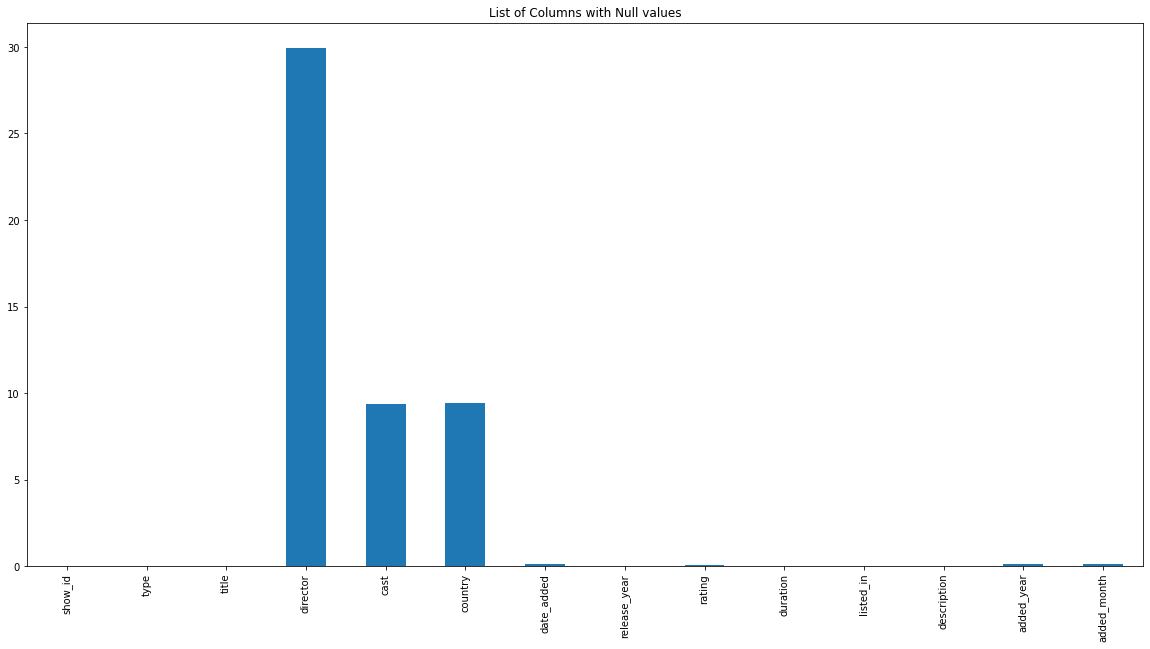

In [ ]:
print(round(100*(df.isnull().sum()/len(df.index)),2))
NA_col = (round(100*(df.isnull().sum()/len(df.index)),2))
plt.figure(figsize=(20,10))
NA_col.plot(kind='bar')
plt.title('List of Columns with Null values')
plt.show()

##Number of unique vlaues of each column

In [ ]:
# Check for each column on how many different values it can have
# Used to find if categorical variables (less than 9) else continous variables.
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
added_year        14
added_month       12
dtype: int64

In [ ]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
added_year       True
added_month      True
dtype: bool

<font color='#0dab7f'> Below columns have null values we need to replace

<font color='#0dab7f'>1) director

<font color='#0dab7f'>2) cast

<font color='#0dab7f'>3) country

<font color='#0dab7f'>4) date_added

<font color='#0dab7f'>5) rating

<font color='#0dab7f'>6) duration

<font color='#0dab7f'>7) added_year

<font color='#0dab7f'>8) added_month

In [ ]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


<font color='#0dab7f'> Replacing null values in director, cast and Country with Unknown

In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
added_year       True
added_month      True
dtype: bool

In [ ]:
df.loc[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN


In [ ]:
df.loc[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017.0,1.0
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016.0,12.0
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018.0,2.0
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017.0,3.0


In [ ]:
df.loc[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


<font color='#0dab7f'><b>Null values</b>: 

<font color='#0dab7f'>Column duration has  <b> 3 </b> NAN rows 

<font color='#0dab7f'>rating has <b> 4 </b> NAN rows

<font color='#0dab7f'>date_added has <b> 10 </b> rows

<font color='#0dab7f'>As the rows with null values are few so we can drop those rows

</font>

In [ ]:
df.dropna(subset=['date_added', 'rating', 'duration'] , inplace = True)

In [ ]:
df.isna().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
added_year      False
added_month     False
dtype: bool

## Removing duplicate rows

In [ ]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(keep='first', inplace = True )
df.duplicated().sum()

0

## Drop columns not required for Analysis

<font color='#0dab7f'>Show_id

In [ ]:
df.drop('show_id', axis = 1, inplace = True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [ ]:
df['added_year'] = df['added_year'].astype('int')
df['added_month'] = df['added_month'].astype('int')
df['release_year'] = df['release_year'].astype('int')
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8786,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8787,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8788,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


## Adding Target Age column based on the listed in Genre

In [ ]:
ratings_age = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    '74 min': 'Unknown',
    '84 min': 'Unknown',
    '66 min': 'Unknown',
}
df['target_age'] = df['rating'].replace(ratings_age)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8786,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Older Kids
8787,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8788,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids



## Unnesting the columns having multiple values 
<font color='#0dab7f'>cast, country and director

In [ ]:
df1 = df.assign(cast=df['cast'].str.split(',')).explode('cast')                        # df = Initial dataframe without exploding the columns with multiple values 
df1 = df1.assign(country=df1['country'].str.split(',')).explode('country')             # df1 = After exploding the columns having multiple values
df1 = df1.assign(listed_in=df1['listed_in'].str.split(',')).explode('listed_in')
df1 = df1.assign(director=df1['director'].str.split(',')).explode('director')

<font color='#0dab7f'>df = Initial dataframe without exploding the columns with multiple values

<font color='#0dab7f'>df1 = After exploding the columns having multiple values

In [ ]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
1,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Adults


In [ ]:
df1.reset_index(drop = True, inplace=True)
df1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
3,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
4,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201832,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019,3,Teens
201833,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019,3,Teens
201834,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019,3,Teens
201835,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019,3,Teens


In [ ]:
df1.describe()

,release_year,added_year,added_month
count,201837.000000,201837.000000,201837.000000
mean,2013.450913,2018.966280,6.635874
std,9.017601,1.551194,3.441555
min,1925.000000,2008.000000,1.000000
25%,2012.000000,2018.000000,4.000000
50%,2016.000000,2019.000000,7.000000
75%,2019.000000,2020.000000,10.000000
max,2021.000000,2021.000000,12.000000


In [ ]:
df1.describe(include = 'object')

,type,title,director,cast,country,rating,duration,listed_in,description,target_age
count,201837,201837,201837,201837,201837,201837,201837,201837,201837,201837
unique,2,8790,5119,39249,198,14,220,73,8758,4
top,Movie,Kahlil Gibran's The Prophet,Unknown,Unknown,United States,TV-MA,1 Season,International Movies,A troubled young girl and her mother find sola...,Adults
freq,145905,700,50425,2149,49781,73883,34977,27141,700,101521


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201837 entries, 0 to 201836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          201837 non-null  object        
 1   title         201837 non-null  object        
 2   director      201837 non-null  object        
 3   cast          201837 non-null  object        
 4   country       201837 non-null  object        
 5   date_added    201837 non-null  datetime64[ns]
 6   release_year  201837 non-null  int64         
 7   rating        201837 non-null  object        
 8   duration      201837 non-null  object        
 9   listed_in     201837 non-null  object        
 10  description   201837 non-null  object        
 11  added_year    201837 non-null  int64         
 12  added_month   201837 non-null  int64         
 13  target_age    201837 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 21.6+ MB


#Univariate Analysis

In [ ]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

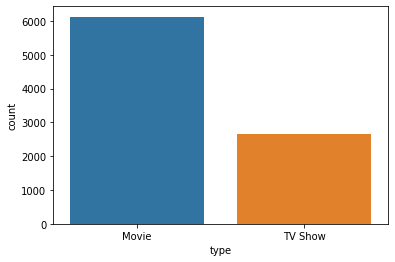

In [ ]:
sns.countplot(data=df, x='type')
plt.show()

<font color='#0dab7f'><b>Observation</b> : More movies[6126] are available in Netflix when compared with TV shows[2664]</font>

<font color='#0dab7f'><b>Recommendation</b> : Netflix can increase business by adding more movies</font>

##Bivariate Analysis

In [ ]:
df1.groupby('rating')['type'].count().sort_values(ascending = False)

rating
TV-MA       73883
TV-14       43885
R           25860
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: type, dtype: int64

[]

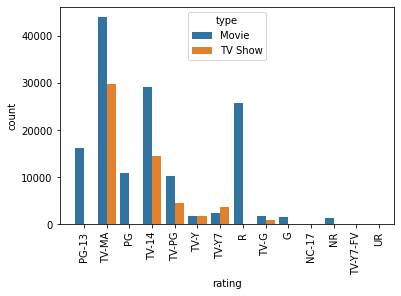

In [ ]:
sns.countplot(data = df1, x='rating', hue = 'type')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b> : TV-MA and TV-14 is the most common rating for tv shows and movies</font>

<font color='#0dab7f'><b>recommendation</b> : Adults rating is TV-MA  and teens rating is TV-14 and which is more in numbers Hence Netflix can increase business by targetting Adults and teens</font>

In [ ]:
df1.groupby('target_age')['type'].count().sort_values(ascending = False)

target_age
Adults        101521
Teens          60131
Older Kids     32212
Kids            7973
Name: type, dtype: int64

[]

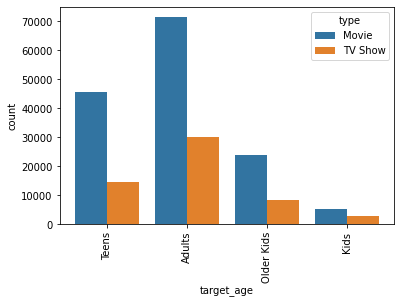

In [ ]:
sns.countplot(data = df1, x='target_age', hue = 'type')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b> : Adults are the target age who watches more tv shows and movies</font>

<font color='#0dab7f'><b>Recommendation</b> : Netflix can target adults for more business</font>

In [ ]:
df1.groupby('country')['type'].count().sort_values(ascending = False).head(50)

country
United States           49781
India                   22139
Unknown                 11894
United Kingdom           9706
 United States           9482
Japan                    7237
South Korea              4628
Canada                   4395
Spain                    4255
France                   4182
 France                  4072
 Canada                  3520
 United Kingdom          3232
Mexico                   3196
Turkey                   2663
 Germany                 2450
Nigeria                  2297
Egypt                    2190
China                    2100
Taiwan                   2049
Indonesia                2048
Germany                  1933
Thailand                 1894
Philippines              1838
Australia                1819
Hong Kong                1773
 Belgium                 1639
Brazil                   1553
Argentina                1500
 Japan                   1362
Italy                    1223
 China                   1217
Colombia                 1117
 S

[]

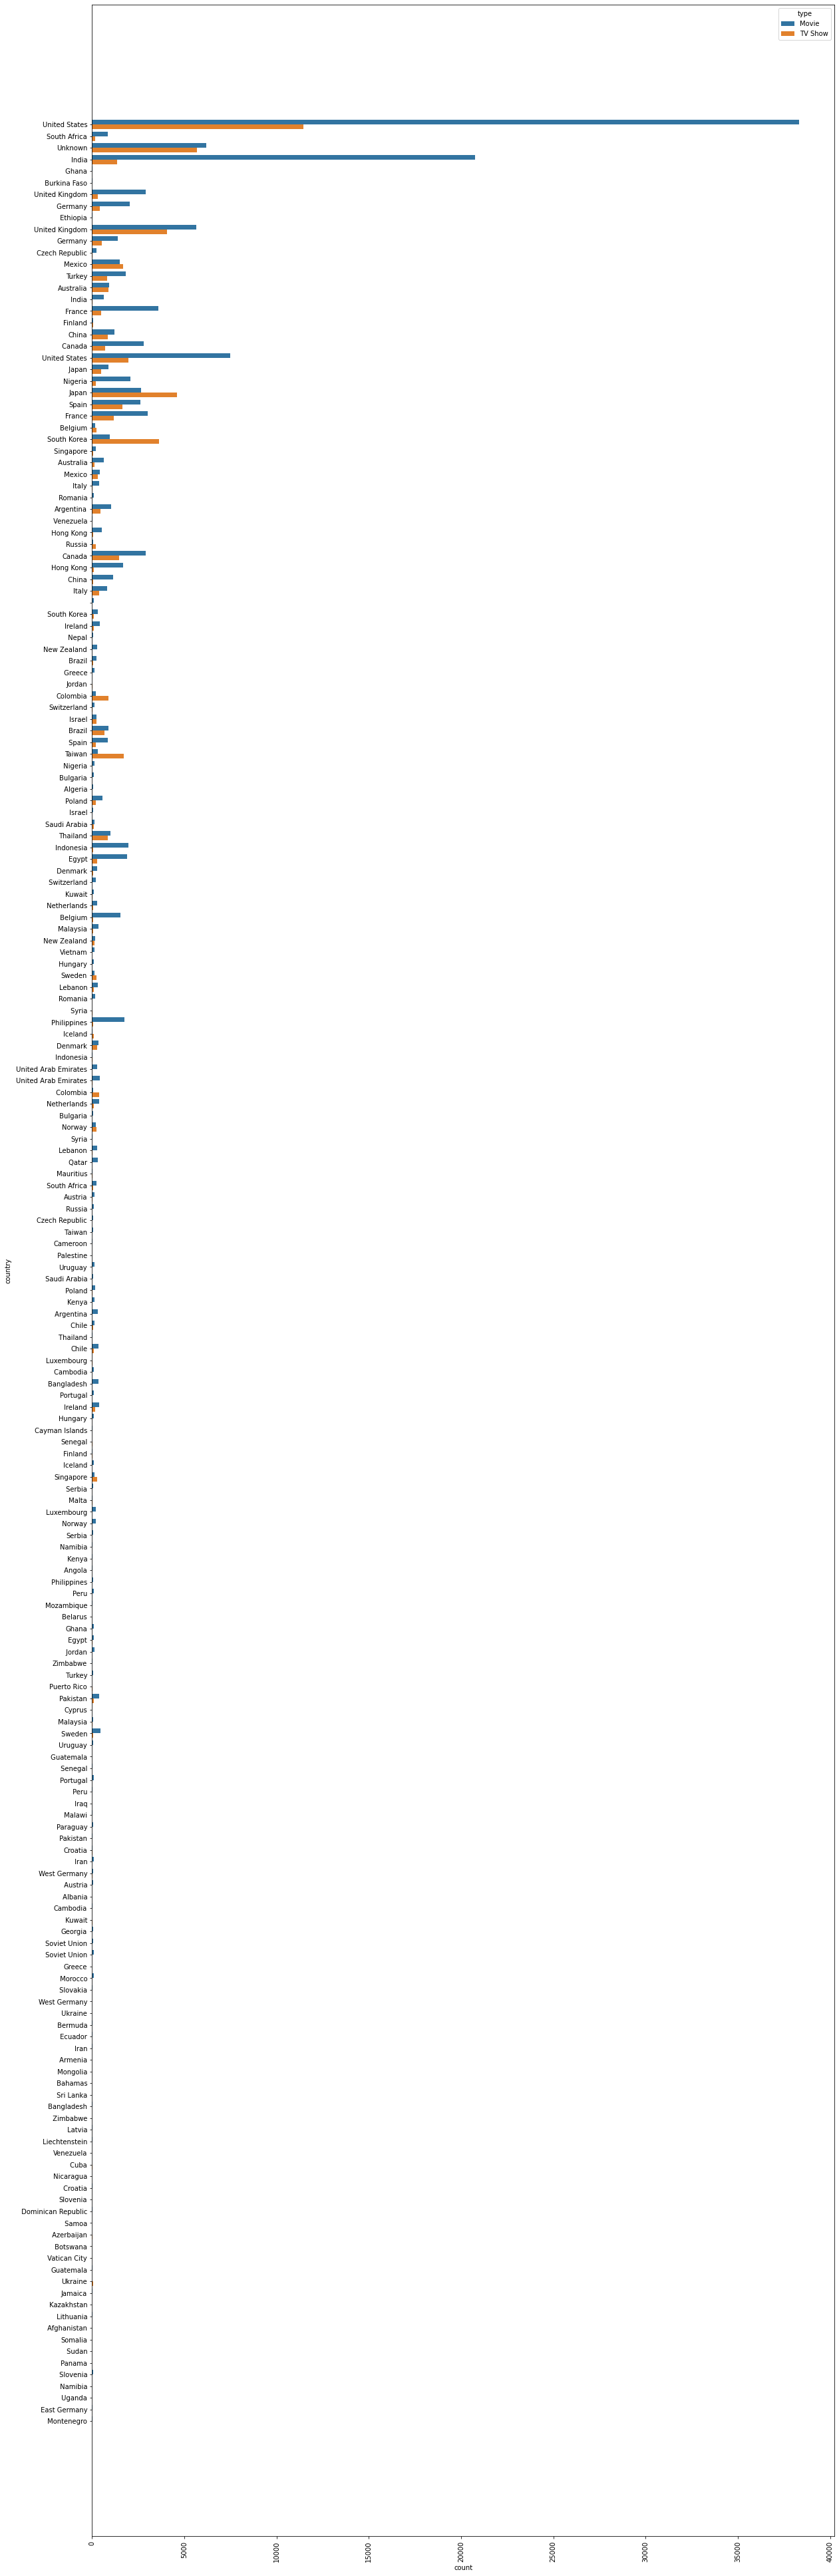

In [ ]:
plt.figure(figsize=(20,70))
sns.countplot(data = df1, y='country', hue = 'type')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b> : United States and India has more tv shows and movies when compared to other countries</font>

<font color='#0dab7f'><b>Recommendation</b>:Netflix can increase movies and tv shows more to USA, INDIA and also to Australia, UK and Germany region which shows next level</font>

In [ ]:
df1.groupby('added_year')['type'].count().sort_values(ascending = False)

added_year
2019    46997
2020    46051
2021    36534
2018    35771
2017    25199
2016     8523
2015     1560
2014      452
2011      438
2013      207
2012       36
2009       30
2010       20
2008       19
Name: type, dtype: int64

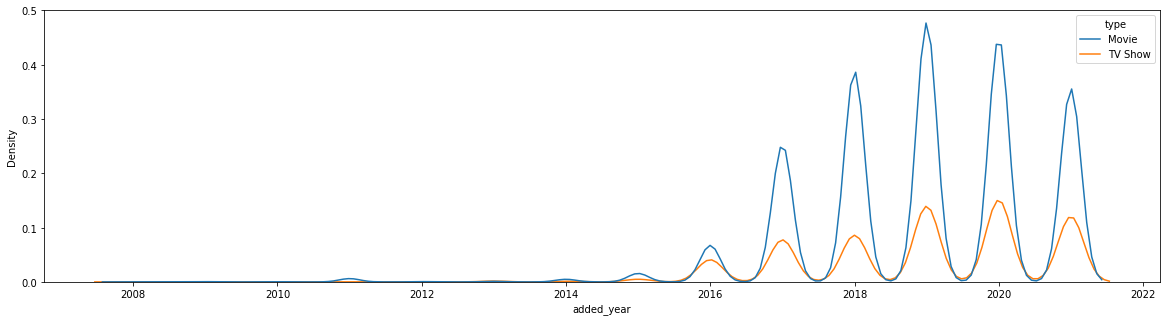

In [ ]:
plt.figure(figsize=(20,5))
sns.kdeplot( x= 'added_year', data=df1, hue='type')
plt.show()

<font color='#0dab7f'><b>Observation</b> : Addition of Movies and TV shows in Net flix over the years 
1. There is increase in movie and TV show addition to Netflix after 2015.
2. In 2019 addition of movie and TV shows reached peak
3. After 2019 it slowly decreased</font>

In [ ]:
df1.groupby('release_year')['type'].count().sort_values(ascending = False)

release_year
2018    24440
2019    21931
2017    20513
2020    19697
2016    18460
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: type, Length: 74, dtype: int64

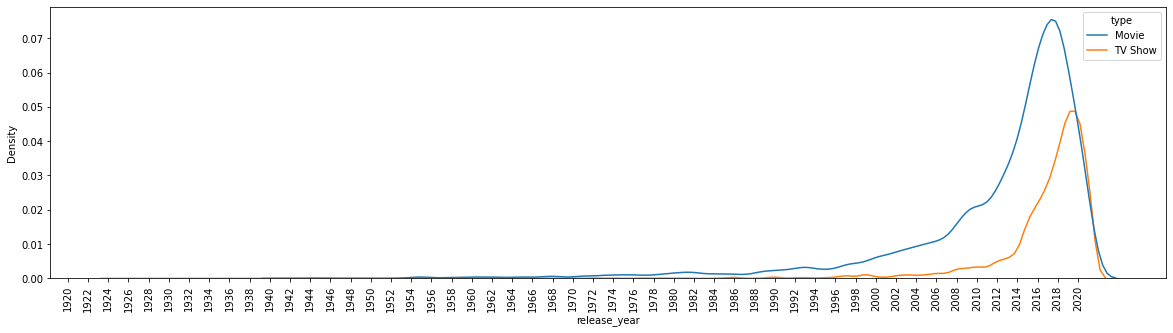

In [ ]:
plt.figure(figsize=(20,5))
sns.kdeplot( x= 'release_year', data=df1, hue='type')
plt.xticks(np.arange(1920, 2022, step = 2), rotation = 90)
plt.show()

<font color='#0dab7f'><b>Observation</b> : Movies and TV shows released over the years 
1. Movie release increased rapidly from 2012, peak at 2017 and 2018 and slowly decreased during covid 2019 and 2020.
2. TV Shows release increased rapidly from 2016, was peak after 2018 
</font>

In [ ]:
df_movie = df.loc[df['type'] == 'Movie']    # considered initial data frame which is unnested in order to avoid duplicates in the movie title
df_movie

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,Older Kids
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,Adults
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,Teens
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,Adults
8785,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8787,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8788,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids


In [ ]:
df_tvshow = df.loc[df['type'] == 'TV Show']    # considered initial data frame which is unnested in order to avoid duplicates in the movie title
df_tvshow

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,Older Kids
8779,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,Older Kids
8780,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,Older Kids
8783,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,Older Kids


In [ ]:
df_m = df_movie['director'].value_counts()[1:].head(10).reset_index()  
df_m

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [ ]:
df_t = df_tvshow['director'].value_counts()[1:].head(10).reset_index()  
df_t

,index,director
0,Alastair Fothergill,3
1,Hsu Fu-chun,2
2,Iginio Straffi,2
3,Shin Won-ho,2
4,Rob Seidenglanz,2
5,Ken Burns,2
6,Stan Lathan,2
7,Quek Shio-chuan,1
8,Peter Ho,1
9,Diego Enrique Osorno,1


[]

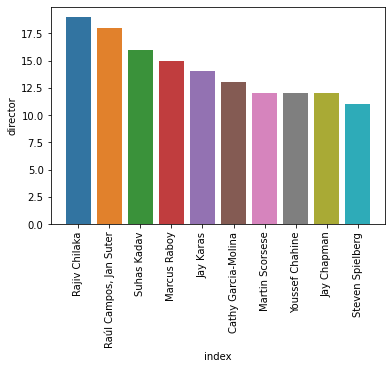

In [ ]:
sns.barplot(data = df_m, x='index', y='director')
plt.xticks(rotation = 90)
plt.plot()

[]

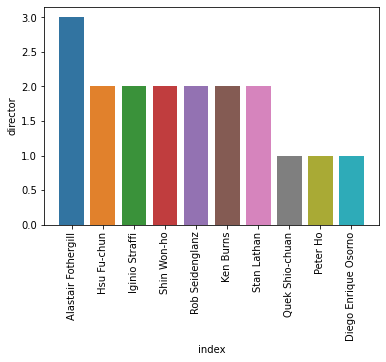

In [ ]:
sns.barplot(data = df_t, x='index', y='director')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b> : director with more movies / tv shows
1. More movies[19] directed by Rajiv Chilaka are available in Netflix
2. More tv shows directed by Alastair Fothergill are available in Netflix


<font color='#0dab7f'><b>Recommendation</b>:Netflix can target Rajiv Chilaka Movie collection to increase business

In [ ]:
df_m_c = df_movie['cast'].value_counts()[1:].head(10).reset_index()
df_m_c

,index,cast
0,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",13
1,Samuel West,10
2,Jeff Dunham,7
3,Kevin Hart,6
4,Craig Sechler,6
5,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",5
6,David Attenborough,5
7,Iliza Shlesinger,5
8,Jim Gaffigan,5
9,"David Spade, London Hughes, Fortune Feimster",5


In [ ]:
df_t_c = df_tvshow['cast'].value_counts()[1:].head(10).reset_index()  # index 0 not considered because there are many movies/tv shows with unknown cast  
df_t_c

,index,cast
0,David Attenborough,14
1,"Michela Luci, Jamie Watson, Anna Claire Bartla...",4
2,Dave Chappelle,3
3,Nadiya Hussain,2
4,Marie Kondo,2
5,Bob Brisbane,2
6,Bettany Hughes,2
7,Peter Coyote,2
8,Morgan Freeman,2
9,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",2


[]

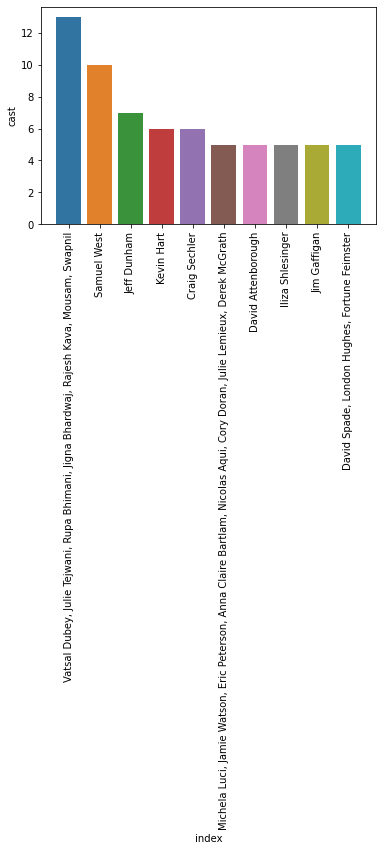

In [ ]:
sns.barplot(data = df_m_c, x='index', y='cast')
plt.xticks(rotation = 90)
plt.plot()

[]

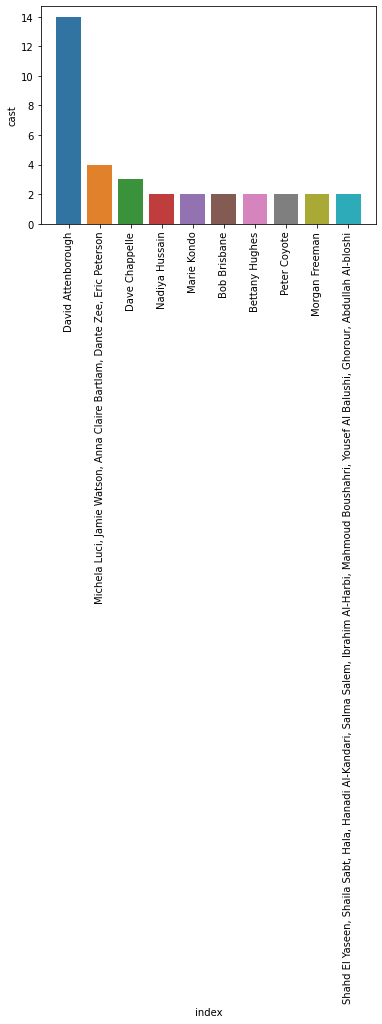

In [ ]:
sns.barplot(data = df_t_c, x='index', y='cast')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b> :More movies / tv shows are casted by below
1. More movies casted by [Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna bardwaj, Rajesh kava, mousam, swapnil] are available in Netflix
2. More tv shows casted by David Attenborough are available in Netflix


<font color='#0dab7f'><b>Recommendation</b> :Netflix can target tv shows casted by David Attenborough to get increase in business

In [ ]:
df_movie['duration'] = df_movie['duration'].str.extract('(\d+)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_movie

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,Older Kids
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,Adults
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,Teens
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,Adults
8785,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8787,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8788,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids


In [ ]:
df_movie['duration'] = df_movie['duration'].replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_movie.loc[df_movie['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age


In [ ]:
df_movie['duration'] = df_movie['duration'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8789
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6126 non-null   object        
 1   title         6126 non-null   object        
 2   director      6126 non-null   object        
 3   cast          6126 non-null   object        
 4   country       6126 non-null   object        
 5   date_added    6126 non-null   datetime64[ns]
 6   release_year  6126 non-null   int64         
 7   rating        6126 non-null   object        
 8   duration      6126 non-null   int64         
 9   listed_in     6126 non-null   object        
 10  description   6126 non-null   object        
 11  added_year    6126 non-null   int64         
 12  added_month   6126 non-null   int64         
 13  target_age    6126 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 717.9+ KB


In [ ]:
df_movie.describe()

,release_year,duration,added_year,added_month
count,6126.000000,6126.000000,6126.000000,6126.000000
mean,2013.120144,99.584884,2018.851126,6.609370
std,9.681723,28.283225,1.561173,3.452541
min,1942.000000,3.000000,2008.000000,1.000000
25%,2012.000000,87.000000,2018.000000,4.000000
50%,2016.000000,98.000000,2019.000000,7.000000
75%,2018.000000,114.000000,2020.000000,10.000000
max,2021.000000,312.000000,2021.000000,12.000000


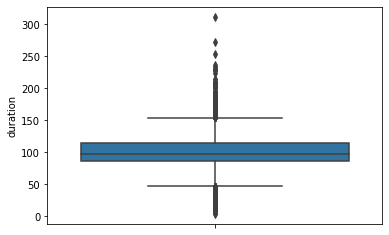

In [ ]:
sns.boxplot(y='duration', data = df_movie)
plt.show()

<font color='#0dab7f'><b>Observation</b> :As there are outliers hence considering 50 quartile as average duration of movie 98 minutes

<font color='#0dab7f'><b>Recommendation</b> :Hence netflix should maintain a duration of equal to or less than 98 minutes for upcoming movies

In [ ]:
df_tvshow['duration'] = df_tvshow['duration'].str.extract('(\d+)')
df_tvshow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,Older Kids
8779,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,Older Kids
8780,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,Older Kids
8783,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,Older Kids


In [ ]:
df_tvshow.loc[df_tvshow['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age


In [ ]:
df_tvshow['duration'] = df_tvshow['duration'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_tvshow.describe()

,release_year,duration,added_year,added_month
count,2664.000000,2664.000000,2664.000000,2664.000000
mean,2016.627628,1.751877,2018.925300,6.762763
std,5.735194,1.550622,1.600804,3.396231
min,1925.000000,1.000000,2008.000000,1.000000
25%,2016.000000,1.000000,2018.000000,4.000000
50%,2018.000000,1.000000,2019.000000,7.000000
75%,2020.000000,2.000000,2020.000000,10.000000
max,2021.000000,17.000000,2021.000000,12.000000


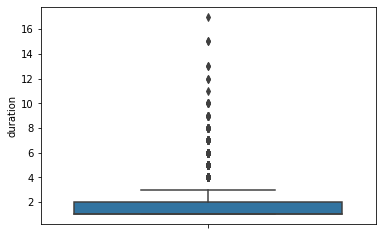

In [ ]:
sns.boxplot(y='duration', data = df_tvshow)
plt.show()

<font color='#0dab7f'><b>Observation</b> :As there are outlier so we are considering average duration of tvshow as 1 season which is equivalent to 50 quartile

<font color='#0dab7f'><b>Recommendation</b> :Hence netflix should maintain a duration of 1 season for upcoming tv shows

In [ ]:
df.nunique()

type               2
title           8790
director        4527
cast            7679
country          749
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
added_year        14
added_month       12
target_age         4
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   cast          8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  description   8790 non-null   object        
 11  added_year    8790 non-null   int64         
 12  added_month   8790 non-null   int64         
 13  target_age    8790 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 961.5+ KB


In [ ]:
# Convert into ordinal - Variable has some order. Eg: Grade has 1 where as Grade B has 2
df['type'] = df['type'].replace('Movie', 1)
df['type'] = df['type'].replace('TV Show', 2)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,2,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,2,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,1,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8786,2,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Older Kids
8787,1,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8788,1,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids


In [ ]:
df['duration'] = df['duration'].str.extract('(\d+)')
df['duration'] = df['duration'].astype('int')
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age
0,1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults
2,2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults
3,2,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults
4,2,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,1,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults
8786,2,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Older Kids
8787,1,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults
8788,1,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids


In [ ]:
ht = df.corr()
ht

,type,release_year,duration,added_year,added_month
type,1.000000,0.182663,-0.885239,0.021665,0.020518
release_year,0.182663,1.000000,-0.249988,0.111624,-0.039031
duration,-0.885239,-0.249988,1.000000,0.029028,-0.017307
added_year,0.021665,0.111624,0.029028,1.000000,-0.160650
added_month,0.020518,-0.039031,-0.017307,-0.160650,1.000000


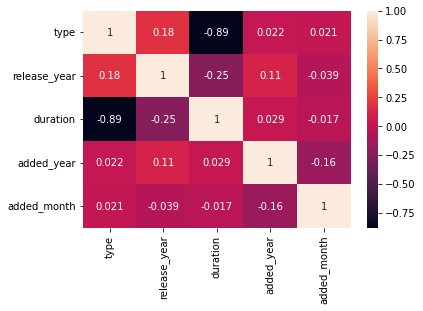

In [ ]:
sns.heatmap(ht, annot=True)

<font color='#0dab7f'><b>Observation</b> :

<font color='#0dab7f'>1) Based on heat map, There is no close interrelation between type , release year , added year, rating.

<font color='#0dab7f'>2) Duration and type are negatively correlated

In [ ]:
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age,count
0,1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens,1
2,2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Adults,1
3,2,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Adults,1
4,2,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Adults,1
5,2,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Adults,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,1,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,Adults,1
8786,2,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,Older Kids,1
8787,1,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults,1
8788,1,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,Older Kids,1


In [ ]:
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_age'],normalize = "index").T
df_heatmap

country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
target_age,,,,,,,,,,
Adults,0.441989,0.669355,0.260288,0.358025,0.772727,0.442211,0.841379,0.511962,0.499466,0.346200
Kids,0.176796,0.096774,0.014403,0.012346,0.018182,0.025126,0.020690,0.100478,0.070488,0.131484
Older Kids,0.220994,0.056452,0.155350,0.246914,0.081818,0.115578,0.041379,0.196172,0.183339,0.235223
Teens,0.160221,0.177419,0.569959,0.382716,0.127273,0.417085,0.096552,0.191388,0.246707,0.287093


[]

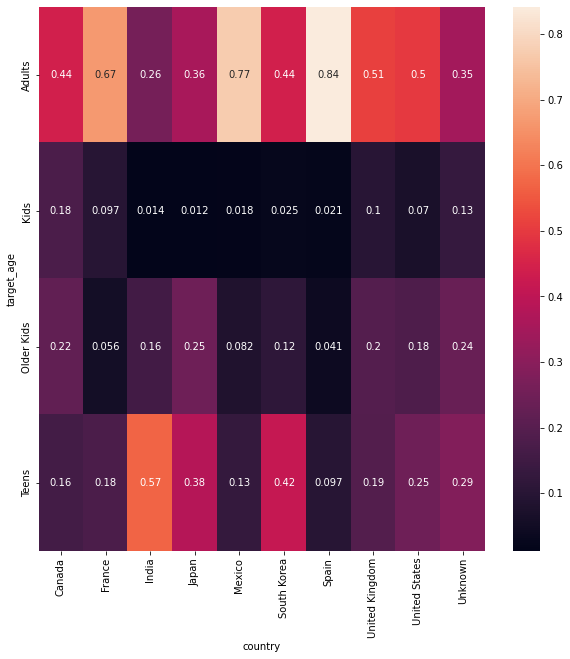

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_heatmap, annot=True )
plt.plot()

<font color='#0dab7f'><b>Observation</b> 
1) India targeted age group is teens
2) More than 40% of Adults are targeted in Canada, France, Mexico, South Korea, Spain, US and UK


<font color='#0dab7f'><b>Recommendation</b>: Netflix can target adults and teens to increase the business

In [ ]:
df_rajiv = df.loc[df['director'] =='Rajiv Chilaka']
df_rajiv

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,target_age,count
406,1,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,64,Children & Family Movies,Things get spooky when Bheem and his buddies t...,2021,7,Older Kids,1
407,1,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2009,TV-Y7,68,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,2021,7,Older Kids,1
408,1,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2011,TV-Y7,67,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,2021,7,Older Kids,1
409,1,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2010,TV-Y7,66,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,2021,7,Older Kids,1
410,1,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64,Children & Family Movies,When a stranger tries to steal an amulet from ...,2021,7,Older Kids,1
411,1,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,64,Children & Family Movies,To save the kingdom of Valhalla from invasion ...,2021,7,Older Kids,1
412,1,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,65,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ...",2021,7,Older Kids,1
413,1,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2013,TV-Y7,64,Children & Family Movies,After learning of a samurai village under thre...,2021,7,Older Kids,1
414,1,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Unknown,2021-07-22,2012,TV-Y7,68,Children & Family Movies,When two evil entities kidnap a princess in a ...,2021,7,Older Kids,1
415,1,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68,Children & Family Movies,"Centuries after the end of a conqueror's rule,...",2021,7,Older Kids,1


[]

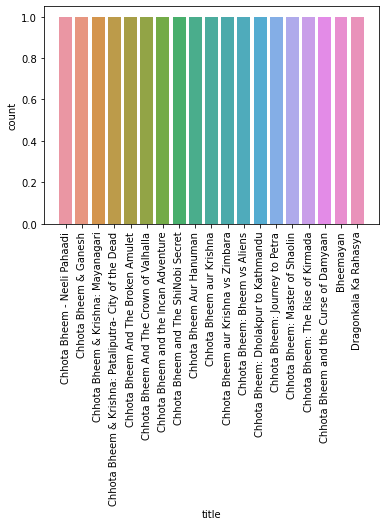

In [ ]:
sns.barplot(data = df_rajiv, x='title', y='count')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b>: Rajiv Chilaka movies
1) His movies are targeted to Children and Family movies
2) He has released 19 movies related to Chota bheem


<font color='#0dab7f'><b>Recommendation</b>: Netflix can target children and family movies similar to Chota bheem released by Rajiv Chilaka

## Summary on Obsevation and Recommendation

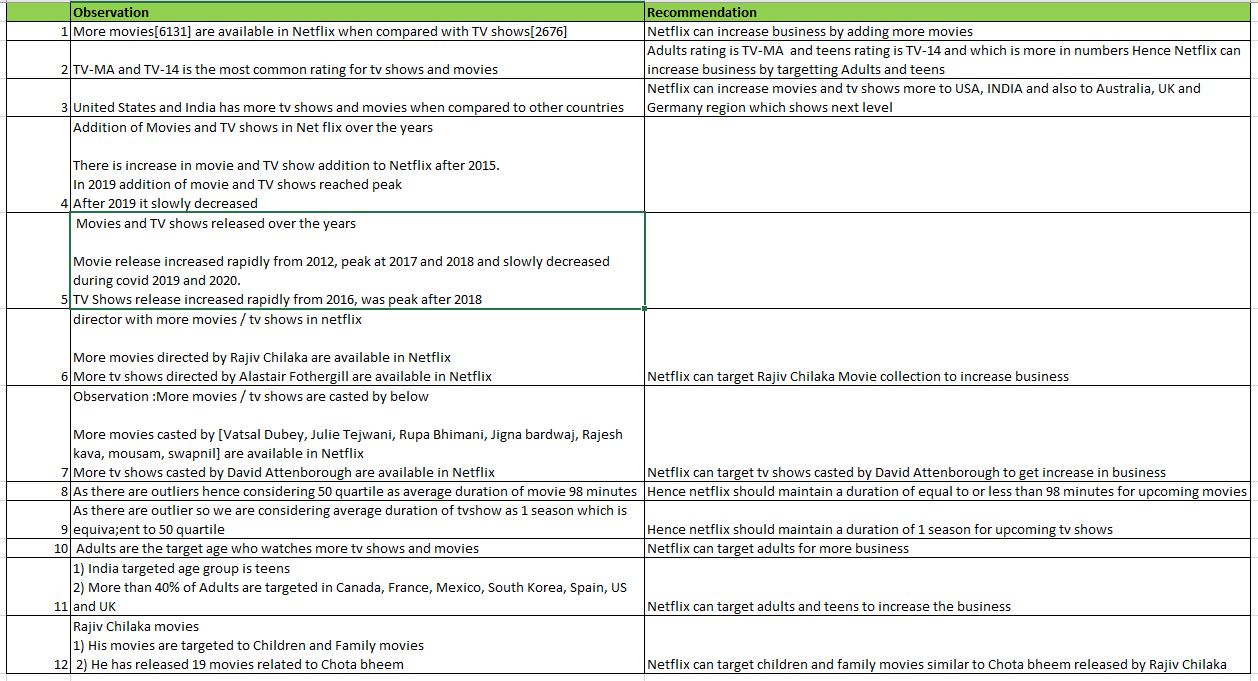